<a href="https://colab.research.google.com/github/psrajput1432/High-School-Exam-Score-Prediction/blob/main/Cognorise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [6]:
df_train = pd.read_csv("/content/drive/MyDrive/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
df_train

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81
...,...,...,...,...,...,...,...,...,...
31994,EXA031995,none,male,some high school,free/reduced,Section E,63,53,80
31995,EXA031996,none,female,high school,standard,Section B,100,80,68
31996,EXA031997,none,male,bachelor's degree,free/reduced,Section B,62,61,74
31997,EXA031998,none,male,associate's degree,standard,Section D,75,32,82


In [7]:
print("Missing Values present in Train data")
print(df_train.isnull().sum())

print("Missing values present in Test data")
print(df_test.isnull().sum())

Missing Values present in Train data
Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
exam score                     0
dtype: int64
Missing values present in Test data
Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
dtype: int64


In [8]:
df_train.rename(columns={'gender':'gender',
                   'parental level of education':'parents_education',
                   'test preparation ':'testprep'

                   }, inplace=True)

df_train.head()

,Roll no,testprep,gender,parents_education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81


In [9]:
df_test.rename(columns={'gender':'gender',
                   'parental level of education':'parents_education',
                   'test preparation ':'testprep'

                   }, inplace=True)

df_test.head()

,Roll no,testprep,gender,parents_education,lunch,Section,practical score,viva score
0,EXA32000,none,male,associate's degree,standard,Section C,74,89
1,EXA32001,completed,male,some high school,standard,Section E,66,75
2,EXA32002,none,male,some high school,standard,Section C,52,55
3,EXA32003,completed,male,some high school,standard,Section D,69,85
4,EXA32004,none,female,bachelor's degree,standard,Section E,46,62


In [10]:
# List of categorical columns
categorical_columns = ['gender',	'parents_education','lunch',	'Section','testprep']

# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = df_train[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'gender': ['male' 'female']
Unique values in 'parents_education': ['some college' "master's degree" 'high school' "associate's degree"
 'some high school' "bachelor's degree"]
Unique values in 'lunch': ['standard' 'free/reduced']
Unique values in 'Section': ['Section A' 'Section C' 'Section E' 'Section D' 'Section B']
Unique values in 'testprep': ['none' 'completed']


In [11]:
train_data = df_train.drop('Roll no', axis=1)
test_data = df_test.drop('Roll no', axis=1)

In [12]:
for col in categorical_columns:
    train_data = pd.get_dummies(data=train_data, columns=[col], drop_first=True, dtype=int)


In [13]:
for col in categorical_columns:
    test_data = pd.get_dummies(data=test_data, columns=[col], drop_first=True, dtype=int)


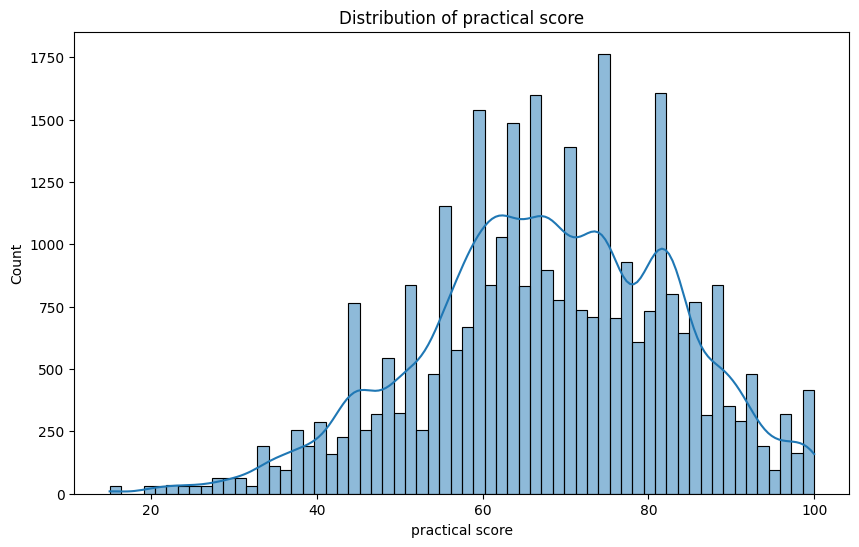

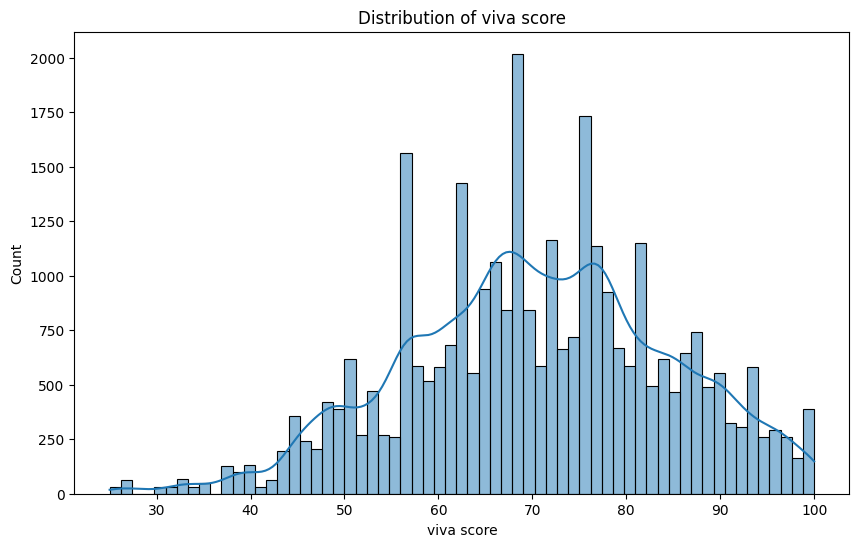

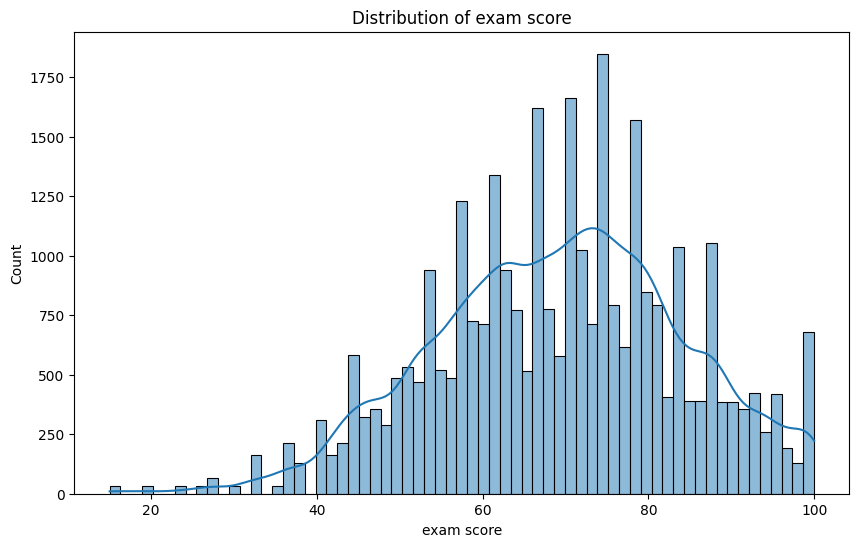

In [14]:
# Distribution plot for numerical columns
numerical_columns = ['practical score', 'viva score', 'exam score']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


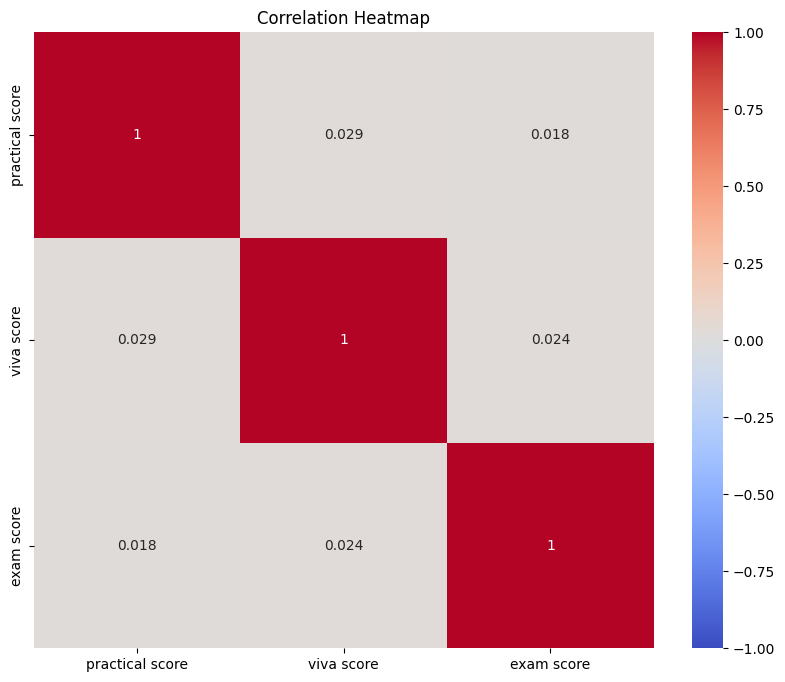

In [15]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = train_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [16]:
X = train_data.drop(['exam score'], axis=1)
y = train_data['exam score']

# Test features
X_test = test_data


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    # 'CatBoost': CatBoostRegressor(n_estimators=100, random_state=42, verbose=0),
    'SVR': SVR()
}

# Evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f'{name} Cross-Validation Mean Squared Error: {-scores.mean()}')


Linear Regression Cross-Validation Mean Squared Error: 226.12690330130644
Decision Tree Cross-Validation Mean Squared Error: 472.1896581441151
Random Forest Cross-Validation Mean Squared Error: 257.61174199852655
Gradient Boosting Cross-Validation Mean Squared Error: 227.36293847172496
XGBoost Cross-Validation Mean Squared Error: 242.30074944640978
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 25599, number of used features: 14
[LightGBM] [Info] Start training from score 69.140005
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

In [21]:
validation_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    validation_results[name] = rmse_val
    print(f'{name} Validation RMSE: {rmse_val}')

# Compare results and select the best model
best_model_name = min(validation_results, key=validation_results.get)
best_model = models[best_model_name]

print(f'Best model based on validation RMSE: {best_model_name} with RMSE: {validation_results[best_model_name]}')


Linear Regression Validation RMSE: 14.863942038274216
Decision Tree Validation RMSE: 20.831637274711245
Random Forest Validation RMSE: 15.464208358696053
Gradient Boosting Validation RMSE: 14.856554810744923
XGBoost Validation RMSE: 15.134822549083845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 25599, number of used features: 14
[LightGBM] [Info] Start training from score 69.117309
LightGBM Validation RMSE: 14.881994004056827
SVR Validation RMSE: 14.925150280680203
Best model based on validation RMSE: Gradient Boosting with RMSE: 14.856554810744923


In [22]:
best_model_name = min(validation_results, key=validation_results.get)
best_model = models[best_model_name]

print(f'Best model based on validation RMSE: {best_model_name} with RMSE: {validation_results[best_model_name]}')

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Predict on test set
test_predictions = best_model.predict(X_test)


Best model based on validation RMSE: Gradient Boosting with RMSE: 14.856554810744923


In [23]:
submission_csv = pd.read_csv("/content/drive/MyDrive/sample submission (1).csv")

In [24]:
# Prepare the submission file
# submission = pd.read_csv('submission.csv')
submission_csv['Exam score'] = test_predictions
submission_csv.to_csv('submission.csv', index=False)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

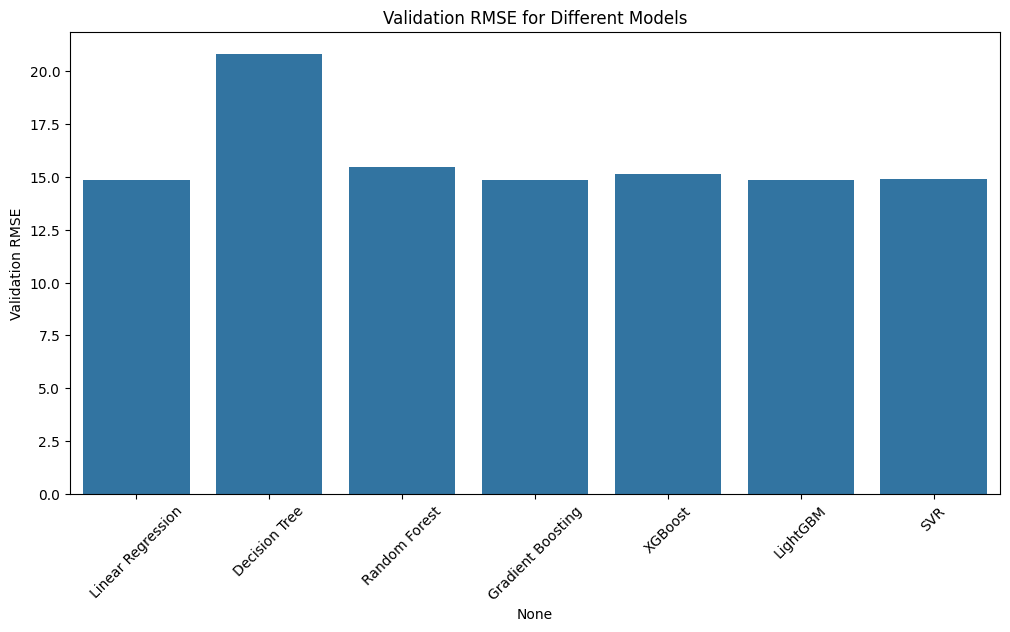

In [26]:

validation_results_df = pd.DataFrame.from_dict(validation_results, orient='index', columns=['Validation RMSE'])
plt.figure(figsize=(12, 6))
sns.barplot(x=validation_results_df.index, y='Validation RMSE', data=validation_results_df)
plt.xticks(rotation=45)
plt.title('Validation RMSE for Different Models')
plt.show()


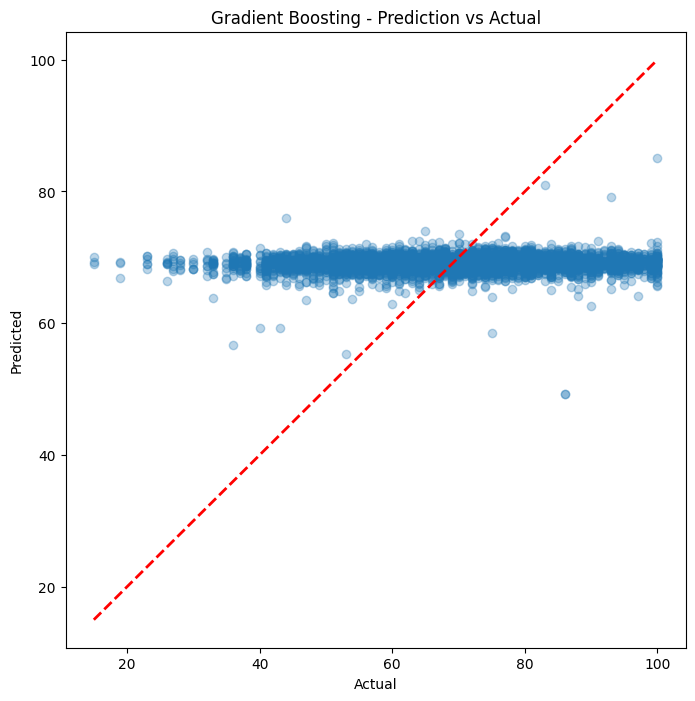

In [27]:
# Predictions from the best model on the validation set
y_val_pred = best_model.predict(X_val)

# Plot prediction vs actual
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_val_pred, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'{best_model_name} - Prediction vs Actual')
plt.show()
